/var/folders/pw/xkpd454x6_ddjhgkzcvrngc40000gn/T/ipykernel_12650/197812336.py:11: DtypeWarning: Columns (8,23,30,38,40,49,70,71,72,73,74,75,78,93,100,109,111,112,120,142,148,149,150,151,152,154,155,156,159,161,162,163,164,165,166,168,169,173,174,175,176,177,178,180,181,258,259,260,261,262,266,267,268,269,284,295,300,301,307,308) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('V2A.CSV')
/var/folders/pw/xkpd454x6_ddjhgkzcvrngc40000gn/T/ipykernel_12650/197812336.py:12: DtypeWarning: Columns (7,22,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,68,71,72,73,74,89,103,109,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('V3A.CSV')


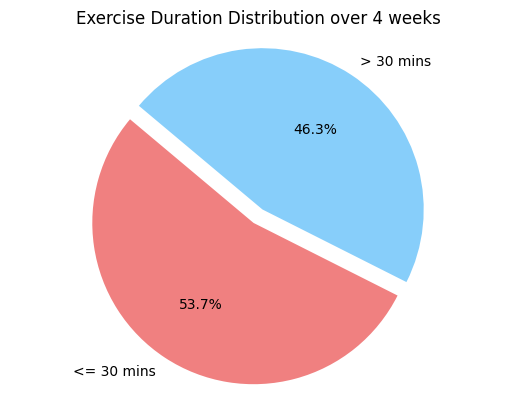

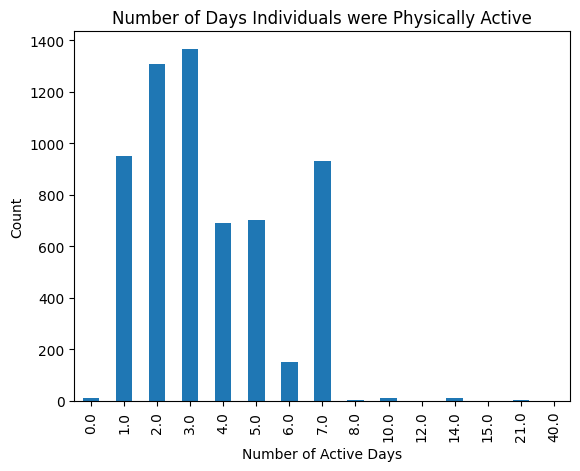

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from pathlib import Path 
# Set matplotlib to inline
%matplotlib inline

# Load data
df1 = pd.read_csv('V2A.CSV')
df2 = pd.read_csv('V3A.CSV')

# Merge data
df = pd.merge(df1, df2, on="PublicID")
# Convert the 'V2AJ01a2' column to numeric format
df['V2AJ01a2'] = pd.to_numeric(df['V2AJ01a2'], errors='coerce')

# Drop rows with missing or non-numeric values in the 'V2AJ01a2' column
df = df.dropna(subset=['V2AJ01a2'])

# Filter the DataFrame to include only rows where exercise duration is more than 30 minutes
filtered_df = df[df['V2AJ01a2'] > 30]

# Count the number of times individuals exercised for more than 30 minutes
num_exercises_gt_30mins = filtered_df['V2AJ01a1'].count()

# Count the number of times individuals exercised for 30 minutes or less
num_exercises_lte_30mins = df['V2AJ01a1'].count() - num_exercises_gt_30mins

# Create a pie chart to visualize the distribution
labels = ['<= 30 mins', '> 30 mins']
sizes = [num_exercises_lte_30mins, num_exercises_gt_30mins]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Exercise Duration Distribution over 4 weeks')

# Show the pie chart
plt.show()


df['V2AJ01a1'] = pd.to_numeric(df['V2AJ01a1'], errors='coerce')

# Drop rows with missing or non-numeric values in the 'V2AJ01a1' column
df = df.dropna(subset=['V2AJ01a1'])

# Calculate the total number of days individuals were physically active
active_days = df['V2AJ01a1']

# Count the occurrences of each number of active days
active_days_counts = active_days.value_counts().sort_index()

# Create a bar plot to visualize the distribution
active_days_counts.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Number of Active Days')
plt.ylabel('Count')
plt.title('Number of Days Individuals were Physically Active')

# Show the plot
plt.show()

